# check the data

In [1]:
# import necessnary packages
import pandas as pd 
import numpy as np 
import seaborn as sns

#import data
raw_data = pd.read_csv("AB_NYC_2019.csv")
print(raw_data.head(20))
print("Total data number = " + str(len(raw_data)))
print("Data number without duplicate = " + str(len(raw_data.drop_duplicates())))
print(raw_data.info())
print(raw_data.describe())

      id                                              name  host_id  \
0   2539                Clean & quiet apt home by the park     2787   
1   2595                             Skylit Midtown Castle     2845   
2   3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3   3831                   Cozy Entire Floor of Brownstone     4869   
4   5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5   5099         Large Cozy 1 BR Apartment In Midtown East     7322   
6   5121                                   BlissArtsSpace!     7356   
7   5178                  Large Furnished Room Near B'way      8967   
8   5203                Cozy Clean Guest Room - Family Apt     7490   
9   5238                Cute & Cozy Lower East Side 1 bdrm     7549   
10  5295                  Beautiful 1br on Upper West Side     7702   
11  5441                   Central Manhattan/near Broadway     7989   
12  5803    Lovely Room 1, Garden, Best Area, Legal rental     9744   
13  60

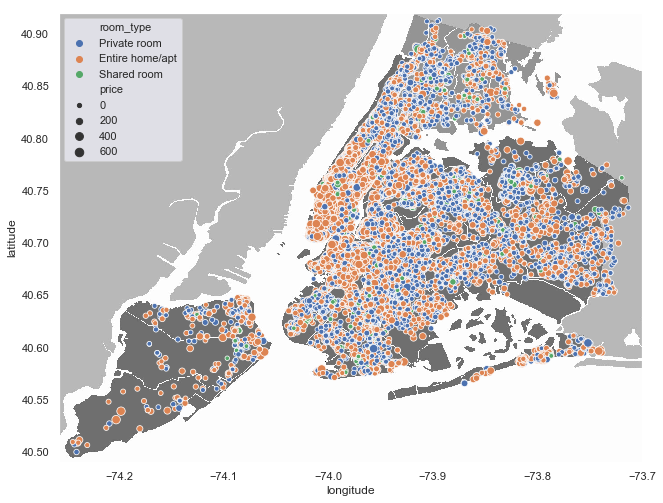

In [2]:
## Visualization
# https://stackoverflow.com/questions/50091591/plotting-seaborn-heatmap-on-top-of-a-background-picture
# get the map image as an array so we can plot it 
import matplotlib.image as mpimg 
map_img = mpimg.imread('New_York_City_.png', 0 ) 

sns.set(rc={'figure.figsize':(11.7,8.27)}) #Set figure size
norm = (0, 500)
scatter = sns.scatterplot(x = "longitude", y = "latitude", hue = "room_type", size = "price", size_norm= norm,  zorder = 2, data= raw_data)
scatter.imshow(map_img,zorder = 1, extent=[-74.258, -73.7, 40.49,40.92]) # extend from https://www.kaggle.com/dgomonov/data-exploration-on-nyc-airbnbhttps://www.kaggle.com/dgomonov/data-exploration-on-nyc-airbnb  


In [3]:
# Save the figure 
fig = scatter.get_figure()
fig.savefig("Room_type and price.png")

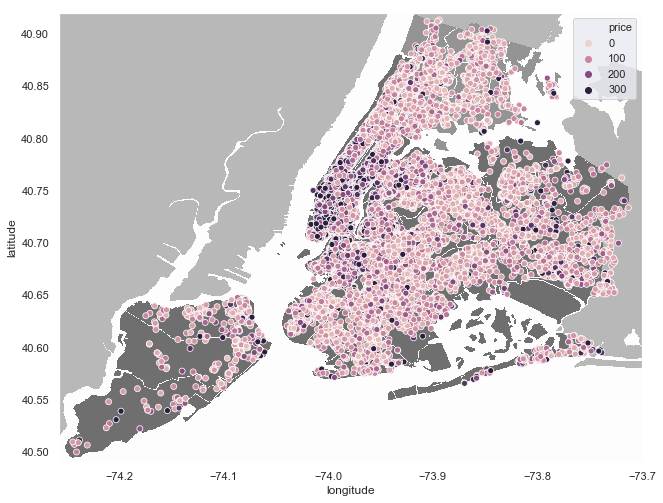

In [4]:
## Second fig
norm = (0, 300)
scatter = sns.scatterplot(x = "longitude", y = "latitude", hue = "price",hue_norm= norm,  zorder = 2, data= raw_data)
scatter.imshow(map_img,zorder = 1, extent=[-74.258, -73.7, 40.49,40.92])


In [5]:

# Save the figure 
fig = scatter.get_figure()
fig.savefig("price.png")# Save the figure

## For each Neighbourgroup

In [8]:
group_name = raw_data["neighbourhood_group"].unique()
group_dict = {}
for x in group_name:
    group_dict[x] = raw_data[raw_data["neighbourhood_group"] == x]


In [11]:
## describe info of every group
for key in group_dict.keys():
    print(key)
    print(group_dict[key].describe())

Brooklyn
                 id       host_id      latitude     longitude         price  \
count  2.010400e+04  2.010400e+04  20104.000000  20104.000000  20104.000000   
mean   1.825685e+07  5.671526e+07     40.685036    -73.951190    124.383207   
std    1.083320e+07  7.260060e+07      0.027397      0.025482    186.873538   
min    2.539000e+03  2.438000e+03     40.571150    -74.039420      0.000000   
25%    8.704324e+06  5.611572e+06     40.672590    -73.963500     60.000000   
50%    1.887604e+07  2.291993e+07     40.687520    -73.951740     90.000000   
75%    2.784395e+07  7.910929e+07     40.704963    -73.935907    150.000000   
max    3.648506e+07  2.743076e+08     40.738900    -73.856760  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    20104.000000       20104.000000       16447.000000   
mean         6.056556          24.202845           1.283212   
std         17.632726          44.344868           1.516259   
min          1.000000      

In [15]:
## show some data of the highest price house of each group
for key in group_dict.keys():
    print(key)
    print(group_dict[key].sort_values(by="price",ascending = False).head(1))

Brooklyn
             id                                             name  host_id  \
17692  13894339  Luxury 1 bedroom apt. -stunning Manhattan views  5143901   

      host_name neighbourhood_group neighbourhood  latitude  longitude  \
17692      Erin            Brooklyn    Greenpoint   40.7326  -73.95739   

             room_type  price  minimum_nights  number_of_reviews last_review  \
17692  Entire home/apt  10000               5                  5  2017-07-27   

       reviews_per_month  calculated_host_listings_count  availability_365  
17692               0.16                               1                 0  
Manhattan
             id                 name   host_id host_name neighbourhood_group  \
29238  22436899  1-BR Lincoln Center  72390391    Jelena           Manhattan   

         neighbourhood  latitude  longitude        room_type  price  \
29238  Upper West Side  40.77213  -73.98665  Entire home/apt  10000   

       minimum_nights  number_of_reviews last_review  revi